In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import pylab as pl
%pylab inline

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [2]:
#create a function for equation for a line, set a and b for defaults
#in case you get lazy
#****classes are not taught here but are encouraged

def makealine(x, a=10, b=5):
    y = a * x + b
    return y

In [3]:
def makealine2(x, a=10, b=5):
    y = a * x + b
    return y + np.random.randn(len(y)) * y.mean()

In [4]:
np.random.seed(999)

In [5]:
# set x axis
x = np.random.uniform(10,100,50) #50 points between 10 and 100
xx = sm.add_constant(x)
xx

array([[  1.        ,  82.30852361],
       [  1.        ,  57.47700661],
       [  1.        ,  20.72003185],
       [  1.        ,  67.57132998],
       [  1.        ,  18.18327365],
       [  1.        ,  39.90031127],
       [  1.        ,  48.46428527],
       [  1.        ,  59.89472312],
       [  1.        ,  66.53138702],
       [  1.        ,  72.76536498],
       [  1.        ,  81.095472  ],
       [  1.        ,  21.87013176],
       [  1.        ,  40.84934065],
       [  1.        ,  28.14036497],
       [  1.        ,  73.65918071],
       [  1.        ,  13.00593379],
       [  1.        ,  91.83250392],
       [  1.        ,  46.46445984],
       [  1.        ,  78.43919233],
       [  1.        ,  52.63825382],
       [  1.        ,  35.80470261],
       [  1.        ,  77.61632399],
       [  1.        ,  18.73809491],
       [  1.        ,  47.11220095],
       [  1.        ,  35.34750663],
       [  1.        ,  45.12500025],
       [  1.        ,  88.39982886],
 

In [6]:
L = makealine(x)

In [7]:
L2 = makealine2(x)

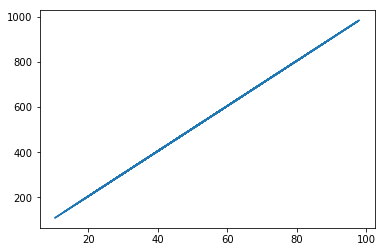

In [8]:
pl.plot(x , L)

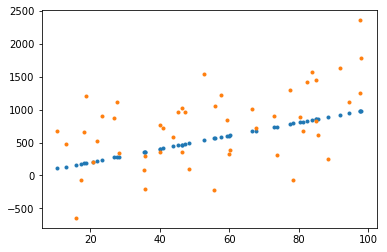

In [9]:
# make a scatter plot where points are not rendered

pl.plot(x,L,'.')
pl.plot(x,L2,'.')

In [10]:
# use stats models to fit it...used to import a lot of R syntax into python

# first do it the wrong way

dir(sm) #gives you all of the content in that package

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'genmod',
 'graphics',
 'iolib',
 'load',
 'nonparametric',
 'qqline',
 'qqplot',
 'qqplot_2samples',
 'regression',
 'robust',
 'show_versions',
 'stats',
 'test',
 'tools',
 'tsa',
 'version',
 'webdoc']

In [11]:
#we are going to first you ols

sm.OLS?

In [12]:
sm.OLS(L, x)
sm.OLS(L2,x)

In [13]:
sm.OLS(L, x).fit()
sm.OLS(L2,x).fit()

In [14]:
lin_model = sm.OLS(L, x).fit()
lin_model2 = sm.OLS(L2,x).fit()

In [15]:
#do dot and tab to see everything you can do...first do fitted values
lin_model.fittedvalues

array([ 829.20182295,  579.04135041,  208.74008463,  680.73472278,
        183.18398869,  401.96822143,  488.24437534,  603.39818307,
        670.25801199,  733.06105666,  816.98116147,  220.326551  ,
        411.52904033,  283.49484248,  742.06563603,  131.02584686,
        925.14938093,  468.09750817,  790.22096888,  530.29424063,
        360.7077782 ,  781.93113571,  188.77343167,  474.62305479,
        356.1018428 ,  454.60337315,  890.56753822,  174.40711534,
        606.61271233,  597.18597865,  401.94772014,  983.19444184,
        360.30627832,  561.57418697,  234.8883102 ,  278.84749803,
        863.10468014,  104.14611413,  810.33633521,  856.44750924,
        951.13261099,  982.58954457,  855.85392319,  160.41917338,
        466.85706379,  440.56394683,  560.888593  ,  987.37259338,
        843.31185725,  270.78455531])

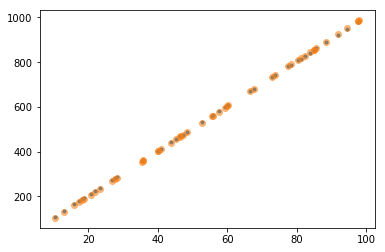

In [16]:
# we can plot them and THIS IS WRONG

pl.plot(x, L, '.')
pl.plot(x, lin_model.fittedvalues,'o',alpha=0.5)

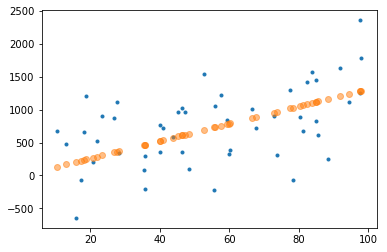

In [17]:
pl.plot(x, L2, '.')
pl.plot(x, lin_model2.fittedvalues,'o',alpha=0.5)

In [18]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.918e+06
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          8.61e-122
Time:                        09:50:07   Log-Likelihood:                -109.49
No. Observations:                  50   AIC:                             221.0
Df Residuals:                      49   BIC:                             222.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.0743      0.005   1979.303      0.000      10.064      10.085
==============================================================================
Omnibus:                       13.322   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.169
Skew:                          -0.037   Prob(JB):                        0.205
Kurtosis:                       1.769   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lin_model.params

array([ 10.07431292])

In [20]:
import statsmodels.formula as smf

In [23]:
smf.OLS('y~x',df)

AttributeError: module 'statsmodels.formula' has no attribute 'OLS'